# Logistic Regression - Cumulative Lab

## Introduction

In this cumulative lab, you will walk through a complete machine learning workflow with logistic regression, including data preparation, modeling (including hyperparameter tuning), and final model evaluation.

## Objectives

You will be able to:

* Practice identifying and applying appropriate preprocessing steps
* Perform an iterative modeling process, starting from a baseline model
* Practice model validation
* Practice choosing a final logistic regression model and evaluating its performance

## Your Task: Complete an End-to-End ML Process with Logistic Regression on the Forest Cover Dataset

![forest road](images/forest_road.jpg)

<span>Photo by <a href="https://unsplash.com/@von_co?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Ivana Cajina</a> on <a href="https://unsplash.com/s/photos/forest-satellite?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Unsplash</a></span>

### Business and Data Understanding

Here we will be using an adapted version of the forest cover dataset from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/covertype). Each record represents a 30 x 30 meter cell of land within Roosevelt National Forest in northern Colorado, which has been labeled as `Cover_Type` 1 for "Cottonwood/Willow" and `Cover_Type` 0 for "Ponderosa Pine". (The original dataset contained 7 cover types but we have simplified it.)

The task is to predict the `Cover_Type` based on the available cartographic variables:

In [1]:
# Run this cell without changes
import pandas as pd

df = pd.read_csv('data/forest_cover.csv')  
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
0,2553,235,17,351,95,780,188,253,199,1410,...,0,0,0,0,0,0,0,0,0,0
1,2011,344,17,313,29,404,183,211,164,300,...,0,0,0,0,0,0,0,0,0,0
2,2022,24,13,391,42,509,212,212,134,421,...,0,0,0,0,0,0,0,0,0,0
3,2038,50,17,408,71,474,226,200,102,283,...,0,0,0,0,0,0,0,0,0,0
4,2018,341,27,351,34,390,152,188,168,190,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38496,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,0
38497,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,0
38498,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,0
38499,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,0


As you can see, we have over 38,000 rows, each with 52 feature columns and 1 target column:

* `Elevation`: Elevation in meters
* `Aspect`: Aspect in degrees azimuth
* `Slope`: Slope in degrees
* `Horizontal_Distance_To_Hydrology`: Horizontal dist to nearest surface water features in meters
* `Vertical_Distance_To_Hydrology`: Vertical dist to nearest surface water features in meters
* `Horizontal_Distance_To_Roadways`: Horizontal dist to nearest roadway in meters
* `Hillshade_9am`: Hillshade index at 9am, summer solstice
* `Hillshade_Noon`: Hillshade index at noon, summer solstice
* `Hillshade_3pm`: Hillshade index at 3pm, summer solstice
* `Horizontal_Distance_To_Fire_Points`: Horizontal dist to nearest wildfire ignition points, meters
* `Wilderness_Area_x`: Wilderness area designation (3 columns)
* `Soil_Type_x`: Soil Type designation (39 columns)
* `Cover_Type`: 1 for cottonwood/willow, 0 for ponderosa pine

This is also an imbalanced dataset, since cottonwood/willow trees are relatively rare in this forest:

In [2]:
# Run this cell without changes
print("Raw Counts")
print(df["Cover_Type"].value_counts())
print()
print("Percentages")
print(df["Cover_Type"].value_counts(normalize=True))

Raw Counts
0    35754
1     2747
Name: Cover_Type, dtype: int64

Percentages
0    0.928651
1    0.071349
Name: Cover_Type, dtype: float64


<AxesSubplot:ylabel='Cover_Type'>

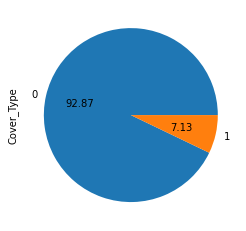

In [8]:
import seaborn as sns
df['Cover_Type'].value_counts().plot(kind='pie', autopct='%.2f')

If we had a model that *always* said that the cover type was ponderosa pine (class 0), what accuracy score would we get?

In [ ]:
# Replace None with appropriate text
"""
We would get more than 90% of the accuracy with class 0
"""

You will need to take this into account when working through this problem.

### Requirements

#### 1. Perform a Train-Test Split

For a complete end-to-end ML process, we need to create a holdout set that we will use at the very end to evaluate our final model's performance.

#### 2. Build and Evaluate a Baseline Model

Without performing any preprocessing or hyperparameter tuning, build and evaluate a vanilla logistic regression model using log loss and `cross_val_score`.

#### 3. Write a Custom Cross Validation Function

Because we are using preprocessing techniques that differ for train and validation data, we will need a custom function rather than simply preprocessing the entire `X_train` and using `cross_val_score` from scikit-learn.

#### 4. Build and Evaluate Additional Logistic Regression Models

Using the function created in the previous step, build multiple logistic regression models with different hyperparameters in order to minimize log loss.

#### 5. Choose and Evaluate a Final Model

Preprocess the full training set and test set appropriately, then evaluate the final model with various classification metrics in addition to log loss.

## 1. Perform a Train-Test Split

This process should be fairly familiar by now. In the cell below, use the variable `df` (that has already been created) in order to create `X` and `y`, then training and test sets using `train_test_split` ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)).

We'll use a random state of 42 and `stratify=y` (to ensure an even balance of tree types) in the train-test split. Recall that the target is `Cover_Type`.

In [9]:
# Replace None with appropriate code
# Import the relevant function
from sklearn.model_selection import train_test_split

# Split df into X and y
X = df.drop(columns=['Cover_Type'], axis=1)
y = df['Cover_Type']

# Perform train-test split with random_state=42 and stratify=y
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, stratify=y)

Check that you have the correct data shape before proceeding:

In [10]:
# Run this cell without changes

# X and y training data should have the same number of rows
assert X_train.shape[0] == y_train.shape[0] and X_train.shape[0] == 28875

# X and y testing data should have the same number of rows
assert X_test.shape[0] == y_test.shape[0] and X_test.shape[0] == 9626

# Both X should have 52 columns
assert X_train.shape[1] == X_test.shape[1] and X_train.shape[1] == 52

# Both y should have 1 column
assert len(y_train.shape) == len(y_test.shape) and len(y_train.shape) == 1

Also, we should have roughly equal percentages of cottonwood/willow trees for train vs. test targets:

In [11]:
# Run this cell without changes
print("Train percent cottonwood/willow:", y_train.value_counts(normalize=True)[1])
print("Test percent cottonwood/willow: ", y_test.value_counts(normalize=True)[1])

Train percent cottonwood/willow: 0.07134199134199135
Test percent cottonwood/willow:  0.0713692083939331


## 2. Build and Evaluate a Baseline Model

Using scikit-learn's `LogisticRegression` model, instantiate a classifier with `random_state=42`. Then use `cross_val_score` with `scoring="neg_log_loss"` to find the average cross-validated log loss for this model on `X_train` and `y_train`.

* [`LogisticRegression` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
* [`cross_val_score` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

(Similar to RMSE, the internal implementation of `cross_val_score` requires that we use "negative log loss" instead of just log loss. The code provided negates the result for you.)

**The code below should produce a warning** but not an error. Because we have not scaled the data, we expect to get a `ConvergenceWarning` five times (once for each fold of cross validation).

In [15]:
# Replace None with appropriate code

# Import relevant class and function
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Instantiate a LogisticRegression with random_state=42
baseline_model = LogisticRegression(random_state=42)

# Use cross_val_score with scoring="neg_log_loss" to evaluate the model
# on X_train and y_train
baseline_neg_log_loss_cv = cross_val_score(baseline_model, X_train, y_train, scoring='neg_log_loss')

baseline_log_loss = -(baseline_neg_log_loss_cv.mean())
baseline_log_loss

D:\Programs\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Programs\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

0.17220641127987432

Ok, so we are getting the `ConvergenceWarning`s we expected, and log loss of around 0.172 with our baseline model.

Is that a "good" log loss? That's hard to say — log loss is not particularly interpretable. 

If we had a model that just chose 0 (the majority class) every time, this is the log loss we would get:

In [16]:
# Run this cell without changes
from sklearn.metrics import log_loss
import numpy as np

log_loss(y_train, np.zeros(len(y_train)))

2.4640650865286937

Loss is a metric where lower is better, so our baseline model is clearly an improvement over just guessing the majority class every time.

Even though it is difficult to interpret, the 0.172 value will be a useful baseline as we continue modeling, to see if we are actually making improvements or just getting slightly better performance by chance.

We will also use other metrics at the last step in order to describe the final model's performance in a more user-friendly way.

## 3. Write a Custom Cross Validation Function

### Conceptual Considerations

First, consider: which preprocessing steps should be taken with this dataset? Recall that our data is imbalanced, and that it caused a `ConvergenceWarning` for our baseline model.

In [ ]:
"""
Because of class imbalance, we should add some kind of resampling
step. Specifically we'll use SMOTE.

We are getting a ConvergenceWarning, which means that the gradient
descent algorithm within the logistic regression is failing to find
an optimized answer. We can also see from looking at the dataset that
some of our variables are quite small (0 or 1) while others range in
the thousands. This indicates that we should add scaling to help
"flatten" the landscape being iterated over by normalizing the
various units of the different columns.
"""

As you likely noted above, we should use some kind of resampling technique to address the large class imbalance. Let's use `SMOTE` (synthetic minority oversampling, [documentation here](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html)), which creates synthetic examples of the minority class to help train the model.

Does SMOTE work just like a typical scikit-learn transformer, where you fit the transformer on the training data then transform both the training and the test data?

In [ ]:
# __SOLUTION
"""
No, SMOTE does not work like that. We never want to oversample the
minority class in the test data, because then we are generating
metrics based on synthetic data and not actual data.

Instead, we only want to fit and transform the training data, and
leave the testing data alone.
"""

As you also likely noted above, we should use some transformer to normalize the data. Let's use a `StandardScaler` ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)).

Does `StandardScaler` work just like a typical scikit-learn transformer, where you fit the transformer on the training data then transform both the training and the test data?

In [ ]:
# Replace None with appropriate text
"""

Yes, StandardScaler is a scikit-learn transformer so it does work
this way. We transform both the train and test data, using the fit
from the training data only.

Often we are a bit sloppy and we fit and transform the entire
X_train prior to performing cross validation, meaning we have some
risk of leakage. Ideally every train split within the cross
validation would be fit with its own scaler, something that is 
achieved more easily with pipelines.

"""

(At this point it's a good idea to double-check your answers against the `solution` branch to make sure you understand the setup.)

### Using `StratifiedKFold`

As you can see from the `cross_val_score` documentation linked above, "under the hood" it is using `StratifiedKFold` for classification tasks.

Essentially `StratifiedKFold` is just providing the information you need to make 5 separate train-test splits inside of `X_train`. Then there is other logic within `cross_val_score` to fit and evaluate the provided model.

So, if our original code looked like this:

```python
baseline_model = LogisticRegression(random_state=42)
baseline_neg_log_loss_cv = cross_val_score(baseline_model, X_train, y_train, scoring="neg_log_loss")
baseline_log_loss = -(baseline_neg_log_loss_cv.mean())
baseline_log_loss
```

The equivalent of the above code using `StratifiedKFold` would look something like this:

In [17]:
# Run this cell without changes
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

# Negative log loss doesn't exist as something we can import,
# but we can create it
neg_log_loss = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

# Instantiate the model (same as previous example)
baseline_model = LogisticRegression(random_state=42)

# Create a list to hold the score from each fold
kfold_scores = np.ndarray(5)

# Instantiate a splitter object and loop over its result
kfold = StratifiedKFold()
for fold, (train_index, val_index) in enumerate(kfold.split(X_train, y_train)):
    # Extract train and validation subsets using the provided indices
    X_t, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_t, y_val = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Clone the provided model and fit it on the train subset
    temp_model = clone(baseline_model)
    temp_model.fit(X_t, y_t)
    
    # Evaluate the provided model on the validation subset
    neg_log_loss_score = neg_log_loss(temp_model, X_val, y_val)
    kfold_scores[fold] = neg_log_loss_score
    
-(kfold_scores.mean())

D:\Programs\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Programs\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

0.17220641127987432

As you can see, this produced the same result as our original cross validation (including the `ConvergenceWarning`s):

In [18]:
# Run this cell without changes
print(baseline_neg_log_loss_cv)
print(kfold_scores)

[-0.17160029 -0.17457733 -0.16301347 -0.1794858  -0.17235516]
[-0.17160029 -0.17457733 -0.16301347 -0.1794858  -0.17235516]


So, what is the point of doing it this way, instead of the much-shorter `cross_val_score` approach?

**Using `StratifiedKFold` "by hand" allows us to customize what happens inside of that loop.**

Therefore we can apply these preprocessing techniques appropriately:

1. Fit a `StandardScaler` object on the training subset (not the full training data) and transform both the train and test subsets
2. Fit a `SMOTE` object and transform only the training subset

### Writing a Custom Cross Validation Function with `StratifiedKFold`

In the cell below, we have set up a function `custom_cross_val_score` that has an interface that resembles the `cross_val_score` function from scikit-learn.

Most of it is set up for you already, all you need to do is add the `SMOTE` and `StandardScaler` steps described above.

In [20]:
# Replace None with appropriate code

# Import relevant sklearn and imblearn classes
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

def custom_cross_val_score(estimator, X, y):
    # Create a list to hold the scores from each fold
    kfold_train_scores = np.ndarray(5)
    kfold_val_scores = np.ndarray(5)

    # Instantiate a splitter object and loop over its result
    kfold = StratifiedKFold(n_splits=5)
    for fold, (train_index, val_index) in enumerate(kfold.split(X, y)):
        # Extract train and validation subsets using the provided indices
        X_t, X_val = X.iloc[train_index], X.iloc[val_index]
        y_t, y_val = y.iloc[train_index], y.iloc[val_index]
        
        # Instantiate StandardScaler
        scaler = StandardScaler()
        # Fit and transform X_t
        X_t_scaled = scaler.fit_transform(X_t)
        # Transform X_val
        X_val_scaled = scaler.transform(X_val)
        
        # Instantiate SMOTE with random_state=42 and sampling_strategy=0.28
        sm = SMOTE(random_state=42, sampling_strategy=0.28)
        # Fit and transform X_t_scaled and y_t using sm
        X_t_oversampled, y_t_oversampled = sm.fit_resample(X_t_scaled, y_t)
        
        # Clone the provided model and fit it on the train subset
        temp_model = clone(estimator)
        temp_model.fit(X_t_oversampled, y_t_oversampled)
        
        # Evaluate the provided model on the train and validation subsets
        neg_log_loss_score_train = neg_log_loss(temp_model, X_t_oversampled, y_t_oversampled)
        neg_log_loss_score_val = neg_log_loss(temp_model, X_val_scaled, y_val)
        kfold_train_scores[fold] = neg_log_loss_score_train
        kfold_val_scores[fold] = neg_log_loss_score_val
        
    return kfold_train_scores, kfold_val_scores
        
model_with_preprocessing = LogisticRegression(random_state=42, class_weight={1: 0.28})
preprocessed_train_scores, preprocessed_neg_log_loss_cv = custom_cross_val_score(model_with_preprocessing, X_train, y_train)
- (preprocessed_neg_log_loss_cv.mean())

0.13235899550296187

The output you get should be about 0.132, and there should no longer be a `ConvergenceWarning`.

If you're not getting the right output, double check that you are applying the correct transformations to the correct variables:

1. `X_t` should be scaled to create `X_t_scaled`, then `X_t_scaled` should be resampled to create `X_t_oversampled`, then `X_t_oversampled` should be used to fit the model
2. `X_val` should be scaled to create `X_val_scaled`, then `X_val_scaled` should be used to evaluate `neg_log_loss`
3. `y_t` should be resampled to create `y_t_oversampled`, then `y_t_oversampled` should be used to fit the model
4. `y_val` should not be transformed in any way. It should just be used to evaluate `neg_log_loss`

Another thing to check is that you used `sampling_strategy=0.28` when you instantiated the `SMOTE` object.

If you are getting the right output, great!  Let's compare that to our baseline log loss:

In [21]:
# Run this cell without changes
print(-baseline_neg_log_loss_cv.mean())
print(-preprocessed_neg_log_loss_cv.mean())

0.17220641127987432
0.13235899550296187


Looks like our preprocessing with `StandardScaler` and `SMOTE` has provided some improvement over the baseline! Let's move on to Step 4.

## 4. Build and Evaluate Additional Logistic Regression Models

Now that we have applied appropriate preprocessing steps to our data in our custom cross validation function, we can reuse that function to test multiple different `LogisticRegression` models.

For each model iteration, make sure you specify `class_weight={1: 0.28}`, because this aligns with the weighting created by our `SMOTE` process.

### Where to Next?

One of the first questions to ask when you start iterating on any model is: ***are we overfitting***? Many of the models you will learn during this course will have built-in functionality to reduce overfitting.

To determine whether we are overfitting, let's examine the training scores vs. the validation scores from our existing modeling process:

In [22]:
# Run this cell without changes
print("Train:     ", -preprocessed_train_scores)
print("Validation:", -preprocessed_neg_log_loss_cv)

Train:      [0.29227141 0.28801243 0.29282026 0.28652204 0.28910185]
Validation: [0.13067576 0.13636961 0.12628191 0.13715658 0.13131112]


Remember that these are loss metrics, meaning lower is better. Are we overfitting?

In [ ]:
# Replace None with appropriate text
"""

While SMOTE makes it somewhat challenging to compare these numbers directly,
it does not appear that we are overfitting. Overfitting would mean getting
significantly better scores on the training data than the validation data

We are getting better metrics on the validation data (where synthetic
examples have not been added) so it does not appear that we are overfitting

"""

It's actually possible that we are underfitting due to too high of regularization. Remember that `LogisticRegression` from scikit-learn has regularization by default

In [23]:
# Run this cell without changes
model_with_preprocessing.get_params()

{'C': 1.0,
 'class_weight': {1: 0.28},
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

That first key-value pair, `'C': 1.0`, specifies the regularization strength. As is noted in the [scikit-learn `LogisticRegression` docs](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), `C` is:

> Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

In general if you are increasing `C` you want to increase it by orders of magnitude. I.e. not increasing it to 1.1, but rather increasing it to 1e3, 1e5, etc.

### Reducing Regularization

In the cell below, instantiate a `LogisticRegression` model with lower regularization (i.e. higher `C`), along with `random_state=42` and `class_weight={1: 0.28}`. Call this model `model_less_regularization`.

In [24]:
# Replace None with appropriate code

model_less_regularization = LogisticRegression(random_state=42, class_weight={1:0.28}, C=1e5)

This code cell double-checks that the model was created correctly:

In [25]:
# Run this cell without changes

# Check variable type
assert type(model_less_regularization) == LogisticRegression

# Check params
assert model_less_regularization.get_params()["random_state"] == 42
assert model_less_regularization.get_params()["class_weight"] == {1: 0.28}
assert model_less_regularization.get_params()["C"] != 1.0

Now, evaluate that model using `custom_cross_val_score`. Recall that `custom_cross_val_score` takes 3 arguments: `estimator`, `X`, and `y`. In this case, `estimator` should be `model_less_regularization`, `X` should be `X_train`, and `y` should be `y_train`.

In [26]:
# Replace None with appropriate code
less_regularization_train_scores, less_regularization_val_scores = custom_cross_val_score( estimator=model_less_regularization,
                                                                                         X=X_train,
                                                                                         y=y_train)

print("Previous Model")
print("Train average:     ", -preprocessed_train_scores.mean())
print("Validation average:", -preprocessed_neg_log_loss_cv.mean())
print("Current Model")
print("Train average:     ", -less_regularization_train_scores.mean())
print("Validation average:", -less_regularization_val_scores.mean())

Previous Model
Train average:      0.2897456010401201
Validation average: 0.13235899550296187
Current Model
Train average:      0.28957525587270677
Validation average: 0.13234435692051444


Your answers will vary somewhat depending on the value of `C` that you chose, but in general you should see a slight improvement, from something like 0.132358 validation average to 0.132344 (improvement of .000014). Not a massive difference but it is an improvement!

### Alternative Solver

Right now we are using the default solver and type of regularization penalty:

In [27]:
# Run this cell without changes
print("solver:", model_less_regularization.get_params()["solver"])
print("penalty:", model_less_regularization.get_params()["penalty"])

solver: lbfgs
penalty: l2


What if we want to try a different kind of regularization penalty?

From the docs:

> * ‘newton-cg’, ‘lbfgs’, ‘sag’ and ‘saga’ handle L2 or no penalty
> * ‘liblinear’ and ‘saga’ also handle L1 penalty
> * ‘saga’ also supports ‘elasticnet’ penalty

In other words, the only models that support L1 or elastic net penalties are `liblinear` and `saga`. `liblinear` is going to be quite slow with the size of our dataset, so let's use `saga`.

In the cell below, create a model that uses `solver="saga"` and `penalty="elasticnet"`. Then use the `l1_ratio` argument to specify the mixing of L1 and L2 regularization. You want a value greater than zero (zero would just mean using L2 regularization) and less than one (one would mean using just L1 regularization).

Remember to also specify `random_state=42`, `class_weight={1: 0.28}`, and `C` equals the value you previously used.

In [29]:
# Replace None with appropriate code
model_alternative_solver = LogisticRegression(
    random_state=42,
    class_weight={1:0.28},
    C=1e5,
    solver='saga',
    penalty='elasticnet',
    l1_ratio=0.5

)

alternative_solver_train_scores, alternative_solver_val_scores = custom_cross_val_score(
    model_alternative_solver,
    X_train,
    y_train
)

print("Previous Model (Less Regularization)")
print("Train average:     ", -less_regularization_train_scores.mean())
print("Validation average:", -less_regularization_val_scores.mean())
print("Current Model")
print("Train average:     ", -alternative_solver_train_scores.mean())
print("Validation average:", -alternative_solver_val_scores.mean())

D:\Programs\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Programs\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Programs\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Programs\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Previous Model (Less Regularization)
Train average:      0.28957525587270677
Validation average: 0.13234435692051444
Current Model
Train average:      0.29297684099860494
Validation average: 0.13604493761082836


D:\Programs\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Most likely you started getting `ConvergenceWarning`s again, even though we are scaling the data inside of `custom_cross_val_score`. When you get a convergence warning in a case like this, you want to modify the `tol` and/or `max_iter` parameters.

### Adjusting Gradient Descent Parameters

If you are getting good results (good metrics) but are still getting a `ConvergenceWarning`, consider increasing the tolerance (`tol` argument). The tolerance specifies how close to zero the gradient must be in order to stop taking additional steps. It's possible that your model is finding a gradient that is close enough to zero, but slightly above the default tolerance, if everything otherwise looks good.

In this case, we are getting slightly worse metrics on both the train and the validation data (compared to a different solver strategy), so increasing the number of iterations (`max_iter`) seems like a better strategy. Essentially this is allowing the gradient descent algorithm to take more steps as it tries to find an optimal solution.

In the cell below, create a model called `model_more_iterations` that has the same hyperparameters as `model_alternative_solver`, with the addition of an increased `max_iter`. You'll need to increase `max_iter` significantly to a number in the thousands.

**Note:** As you increase `max_iter`, it is normal for the execution time of fitting the model to increase. The following cell may take up to several minutes to execute. Try to be patient with this exercise! If this step times out, you can just read on ahead.

In [30]:
# Replace None with appropriate code
model_more_iterations = LogisticRegression(
    random_state=42,
    class_weight={1:0.28},
    C=1e5,
    solver='saga',
    penalty='elasticnet',
    l1_ratio=0.5,
    max_iter=1000

)

more_iterations_train_scores, more_iterations_val_scores = custom_cross_val_score(
    model_more_iterations,
    X_train,
    y_train
)

print("Previous Best Model (Less Regularization)")
print("Train average:     ", -less_regularization_train_scores.mean())
print("Validation average:", -less_regularization_val_scores.mean())
print("Previous Model with This Solver")
print("Train average:     ", -alternative_solver_train_scores.mean())
print("Validation average:", -alternative_solver_val_scores.mean())
print("Current Model")
print("Train average:     ", -more_iterations_train_scores.mean())
print("Validation average:", -more_iterations_val_scores.mean())

D:\Programs\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Programs\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Programs\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Programs\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Previous Best Model (Less Regularization)
Train average:      0.28957525587270677
Validation average: 0.13234435692051444
Previous Model with This Solver
Train average:      0.29297684099860494
Validation average: 0.13604493761082836
Current Model
Train average:      0.2897239832643445
Validation average: 0.1324977226653306


D:\Programs\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


The results you got are most likely around 0.13241, whereas the previous model was around 0.13234. In other words, even after waiting all that time, we are getting 0.00007 worse log loss with this solver.

This is a fairly typical experience when hyperparameter tuning! Often the default hyperparameters are the default because they work best in the most situations. This is especially true of logistic regression, which has relatively few hyperparameters. Once we get to more complex models, there are more "levers to pull" (hyperparameters to adjust) so it is more likely that we'll improve performance by deviating from the default.

Let's declare the `model_less_regularization` to be our best model, and move on to the final evaluation phase.

## 5. Choose and Evaluate a Final Model

In [32]:
# Run this cell without changes
final_model = model_less_regularization

In order to evaluate our final model, we need to preprocess the full training and test data, fit the model on the full training data, and evaluate it on the full test data. Initially we'll continue to use log loss for the evaluation step.

### Preprocessing the Full Dataset

In [33]:
# Replace None with appropriate code

# Instantiate StandardScaler
scaler = StandardScaler()
# Fit and transform X_train
X_train_scaled = scaler.fit_transform(X_train)
# Transform X_test
X_test_scaled = scaler.transform(X_test)

# Instantiate SMOTE with random_state=42 and sampling_strategy=0.28
sm = SMOTE(random_state=42, sampling_strategy=0.28)
# Fit and transform X_train_scaled and y_train using sm
X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train_scaled, y_train)

### Fitting the Model on the Full Training Data

In [34]:
# Run this cell without changes
final_model.fit(X_train_oversampled, y_train_oversampled)

LogisticRegression(C=100000.0, class_weight={1: 0.28}, random_state=42)

### Evaluating the Model on the Test Data

#### Log Loss

In [35]:
# Run this cell without changes
log_loss(y_test, final_model.predict_proba(X_test_scaled))

0.13031294393914358

Great! We are getting slightly better performance when we train the model with the full training set, compared to the average cross-validated performance. This is typical since models tend to perform better with more training data.

This model has improved log loss compared to our initial baseline model, which had about 0.172.

But we're not quite done here!

If we wanted to present this forest cover classification model to non-technical stakeholders, log loss would be a confusing choice. Let's compute some other metrics that tell the story of our model's performance in a more interpretable way.

#### Accuracy

Although we noted the issues with accuracy as a metric on unbalanced datasets, accuracy is a very intuitive metric. Recall that we would expect an accuracy of about 0.928651 if we identified every cell as class 0. What accuracy do we get with our new model?

(Note that we used `.predict_proba` above, but accuracy uses `.predict`)

In [36]:
# Replace None with appropriate code

from sklearn.metrics import accuracy_score

accuracy_score(y_test, final_model.predict(X_test_scaled))

0.9456679825472678

In other words, our model correctly identifies the type of forest cover about 94.6% of the time, whereas always guessing the majority class (ponderosa pine) would only be accurate about 92.9% of the time.

#### Precision

If we always chose the majority class, we would expect a precision of 0, since we would never identify any "true positives". What is the precision of our final model? Use `precision_score` from scikit-learn ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)).

In [37]:
# Replace None with appropriate code

# Import the relevant function
from sklearn.metrics import precision_score

# Display the precision score
precision_score(y_test, final_model.predict(X_test_scaled))

0.6659919028340081

In other words, if our model labels a given cell of forest as class 1, there is about a 66.6% chance that it is actually class 1 (cottonwood/willow) and about a 33.4% chance that it is actually class 0 (ponderosa pine).

#### Recall

Again, if we always chose the majority class, we would expect a recall of 0. What is the recall of our final model? Use `recall_score` from scikit-learn ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)).

In [39]:
# Replace None with appropriate code

# Import the relevant function
from sklearn.metrics import recall_score

# Display the recall score
recall_score(y_test, final_model.predict(X_test_scaled))

0.47889374090247455

In other words, if a given cell of forest is actually class 1, there is about a 47.9% chance that our model will correctly label it as class 1 (cottonwood/willow) and about a 52.1% chance that our model will incorrectly label it as class 0 (ponderosa pine).

#### Interpretation

Depending on the stakeholder, you most likely want to report just precision or just recall. Try to understand their business case:

* If false positives are a bigger problem (labeled cottonwood/willow when it's really ponderosa pine), precision is the important metric to report
* If false negatives are a bigger problem (labeled ponderosa pine when it's really cottonwood/willow), recall is the important metric to report

If those problems have truly equal importance, you could report an f1-score instead, although this is somewhat more difficult for the average person to interpret.

#### BONUS: Adjusting the Decision Threshold

If either of those problems is important enough that it outweighs overall accuracy, you could also adjust the decision threshold of your final model to improve the metric that matters most. Let's say that it's important to improve the recall score — that we want to be able to correctly label more of the cottonwood/willow trees as cottonwood/willow trees, even if that means accidentally labeling more ponderosa pine as cottonwood/willow incorrectly.

Then we can use `.predict_proba` to err on the side of the positive class. Let's use an exaggerated example, which assumes that false negatives are a very significant problem. Instead of using the default 50% threshold (where a probability over 0.5 is classified as positive) let's say that if there is greater than a 1% chance it's positive, we classify it as positive:

(If the opposite issue were the case — it's very important that every area classified as 1 is actually cottonwood/willow — you would want the threshold to be higher than 50% rather than lower than 50%.)

In [40]:
# Run this cell without changes

def final_model_func(model, X):
    """
    Custom function to predict probability of
    cottonwood/willow. If the model says there
    is >1% chance, we label it as class 1
    """
    probs = model.predict_proba(X)[:,1]
    return [int(prob > 0.01) for prob in probs]

# Calculate predictions with adjusted threshold and
# display proportions of predictions
threshold_adjusted_probs = pd.Series(final_model_func(final_model, X_test_scaled))
threshold_adjusted_probs.value_counts(normalize=True)

0    0.586433
1    0.413567
dtype: float64

So, now we are predicting that everything over a 1% chance of being class 1 as class 1, which means that we're classifying about 58.6% of the records as class 0 and 41.4% of the records as class 1.

In [41]:
# Run this cell without changes
print("Accuracy:", accuracy_score(y_test, threshold_adjusted_probs))
print("Recall:  ", recall_score(y_test, threshold_adjusted_probs))

Accuracy: 0.6565551630999377
Recall:   0.9912663755458515


This means that we are able to identify 99.1% of the true positives (i.e. 99.1% of the cottonwood/willow cells are identified). However this comes at a cost; our overall accuracy is now 65.7% instead of over 90%.

So we are classifying over 40% of the cells as cottonwood/willow, even though fewer than 10% of the cells are actually that category, in order to miss as few true positives as possible. Even though this seems fairly extreme, our model is still better than just choosing class 1 every time (that model would have about 7% accuracy).

This kind of model might be useful if there is some kind of treatment needed for cottonwood/willow trees, but your organization only has the resources to visit fewer than half of the study areas. This model would allow them to visit 41% of the areas and successfully treat over 99% of the cottonwood/willow trees.

You can also imagine a less-drastic version of this threshold adjusting, where you trade off a marginal improvement in precision or recall for a marginal reduction in accuracy. Visually inspecting the precision-recall curve ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_precision_recall_curve.html)) can help you choose the threshold based on what you want to optimize.

## Summary

In this lab, you completed an end-to-end machine learning modeling process with logistic regression on an imbalanced dataset. First you built and evaluated a baseline model. Next you wrote a custom cross validation function in order to use SMOTE resampling appropriately (without needing an `imblearn` pipeline). After that, you tuned the model through adjusting the regularization strength and the gradient descent hyperparameters. Finally, you evaluated your final model on log loss as well as more user-friendly metrics.